Online Customer Cluster Practice

In [79]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import datetime as dt
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
#Dataset Loading
df = pd.read_csv('data/Online_retail.csv',encoding='latin-1')
df.head()

# import chardet

# with open('data/Online_retail.csv', 'rb') as file:
#     raw_data = file.read()

# detected = chardet.detect(raw_data)
# encoding = detected['encoding']

# df = pd.read_csv('data/Online_retail.csv', encoding=encoding)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [82]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [83]:
# Data Cleansing


# deleting error data
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]

#deleting null data
df = df[df['CustomerID'].notnull()]

print(df.shape)
df.isnull().sum()

(397884, 8)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  object 
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [85]:
#df.drop(columns='CustomerID',inplace=True,axis=1)

In [86]:
df['Country'].value_counts()

Country
United Kingdom          354321
Germany                   9040
France                    8341
EIRE                      7236
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1462
Australia                 1182
Norway                    1071
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45


In [87]:
#As it is based on UK, we will look into domestic (United Kingdom) online retail
df = df[df['Country']=='United Kingdom']

print(df.shape)

(354321, 8)


In [88]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


Data Processing

In [89]:
df['SaleAmount'] = df['Quantity'] * df['UnitPrice']
df['CustomerID'] = df['CustomerID'].astype(int)

df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850,United Kingdom,22.00


In [90]:
#listing 'how many' buying
print(df['CustomerID'].value_counts().head())

print()

#listing 'how much' buying
print(df.groupby('CustomerID')['SaleAmount'].sum().sort_values(ascending=False))

CustomerID
17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: count, dtype: int64

CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
           ...    
16878        13.30
17956        12.75
16454         6.90
14792         6.20
16738         3.75
Name: SaleAmount, Length: 3920, dtype: float64


<Axes: xlabel='count', ylabel='Count'>

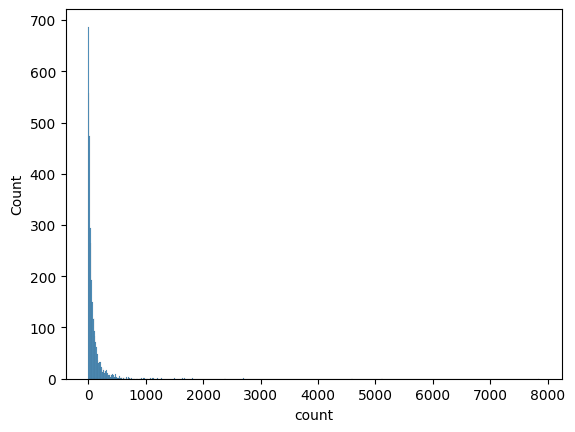

In [91]:
#listing 'how many' buying
sns.histplot(df['CustomerID'].value_counts())

(array([3.887e+03, 1.900e+01, 9.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([3.75000000e+00, 2.59691050e+04, 5.19344600e+04, 7.78998150e+04,
        1.03865170e+05, 1.29830525e+05, 1.55795880e+05, 1.81761235e+05,
        2.07726590e+05, 2.33691945e+05, 2.59657300e+05]),
 <BarContainer object of 10 artists>)

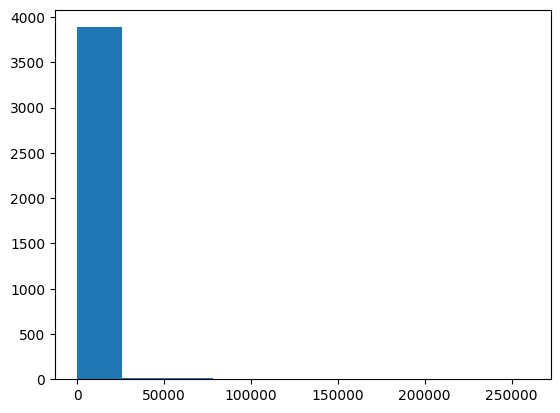

In [92]:
#listing 'how much' buying
plt.hist(df.groupby('CustomerID')['SaleAmount'].sum().sort_values(ascending=False))

In [93]:
df.groupby(['InvoiceNo','StockCode'])['InvoiceNo'].count().mean()

1.028702077315023

In [94]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [95]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804,United Kingdom,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113,United Kingdom,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113,United Kingdom,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113,United Kingdom,214.80


In [96]:
df.groupby('InvoiceNo')['InvoiceNo'].value_counts()

InvoiceNo
536365     7
536366     2
536367    12
536368     4
536369     1
          ..
581582     2
581583     2
581584     2
581585    21
581586     4
Name: count, Length: 16646, dtype: int64

<Axes: xlabel='count', ylabel='Count'>

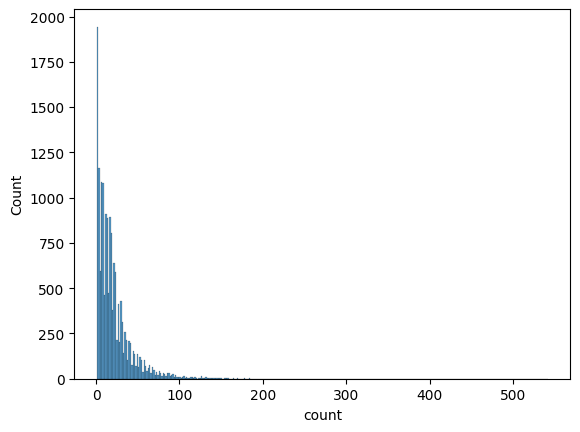

In [104]:
sns.histplot(df.groupby('InvoiceNo')['InvoiceNo'].value_counts())

In [98]:
#Recency = InvoiceDate.max()
#Frequency = InvoiceNo.count()
#Monetary value =  sale_amount.sum()

aggregations = {
    'InvoiceDate': 'max',
    'InvoiceNo': 'count',
    'SaleAmount':'sum'
}


#Based on CustomerID 
cust_df = df.groupby('CustomerID').agg(aggregations)

cust_df = cust_df.rename(columns = {'InvoiceDate':'Recency',
                                    'InvoiceNo':'Frequency',
                                    'SaleAmount':'Monetary'
                                   }
                        )

cust_df = cust_df.reset_index()
cust_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73
3,12749,2011-12-06 09:56:00,199,4090.88
4,12820,2011-12-06 15:12:00,59,942.34


In [99]:
cust_df['Recency'].max()

Timestamp('2011-12-09 12:49:00')

In [100]:
cust_df['Recency'] = dt.datetime(2011,12,10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1)
print(cust_df.shape)
cust_df.head()

(3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73
3,12749,4,199,4090.88
4,12820,4,59,942.34


Customer Clustering

(array([1701.,  728.,  331.,  215.,  208.,  179.,  170.,  153.,  120.,
         115.]),
 array([  1. ,  38.3,  75.6, 112.9, 150.2, 187.5, 224.8, 262.1, 299.4,
        336.7, 374. ]),
 <BarContainer object of 10 artists>)

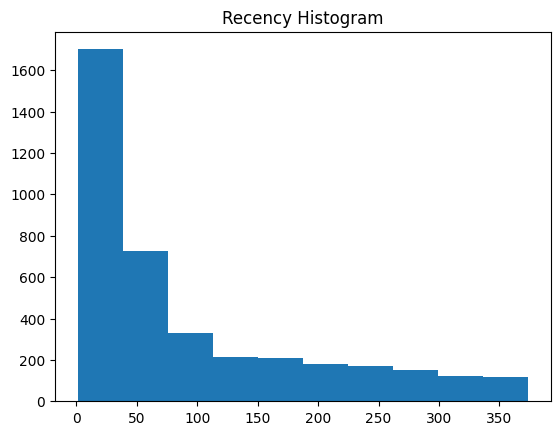

In [101]:
plt.title('Recency Histogram')
plt.hist(cust_df['Recency'])

(array([3.894e+03, 1.800e+01, 3.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e+00, 7.8560e+02, 1.5702e+03, 2.3548e+03, 3.1394e+03,
        3.9240e+03, 4.7086e+03, 5.4932e+03, 6.2778e+03, 7.0624e+03,
        7.8470e+03]),
 <BarContainer object of 10 artists>)

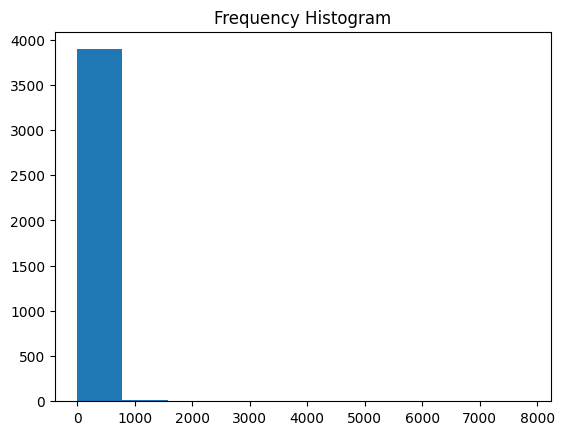

In [105]:
plt.title('Frequency Histogram')
plt.hist(cust_df['Frequency'])

(array([3.887e+03, 1.900e+01, 9.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([3.75000000e+00, 2.59691050e+04, 5.19344600e+04, 7.78998150e+04,
        1.03865170e+05, 1.29830525e+05, 1.55795880e+05, 1.81761235e+05,
        2.07726590e+05, 2.33691945e+05, 2.59657300e+05]),
 <BarContainer object of 10 artists>)

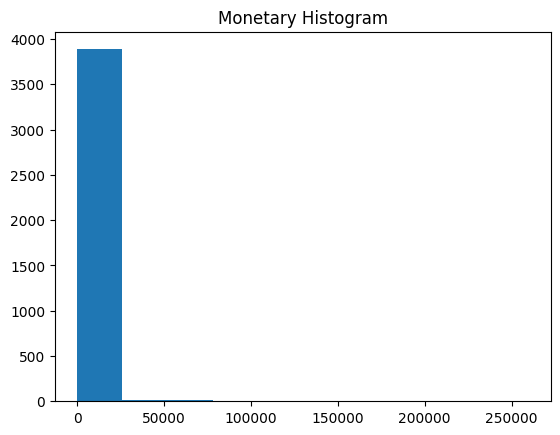

In [106]:
plt.title('Monetary Histogram')
plt.hist(cust_df['Monetary'])

In [107]:
cust_df[['Recency','Frequency','Monetary']].describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,300.280000
50%,51.000000,41.000000,652.280000
75%,143.000000,99.250000,1576.585000
max,374.000000,7847.000000,259657.300000


In [108]:
# K-Means Clustering & Silhouette Coefficient Evaluation

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

#converted to normal distribution
X_features = cust_df[['Recency','Frequency','Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

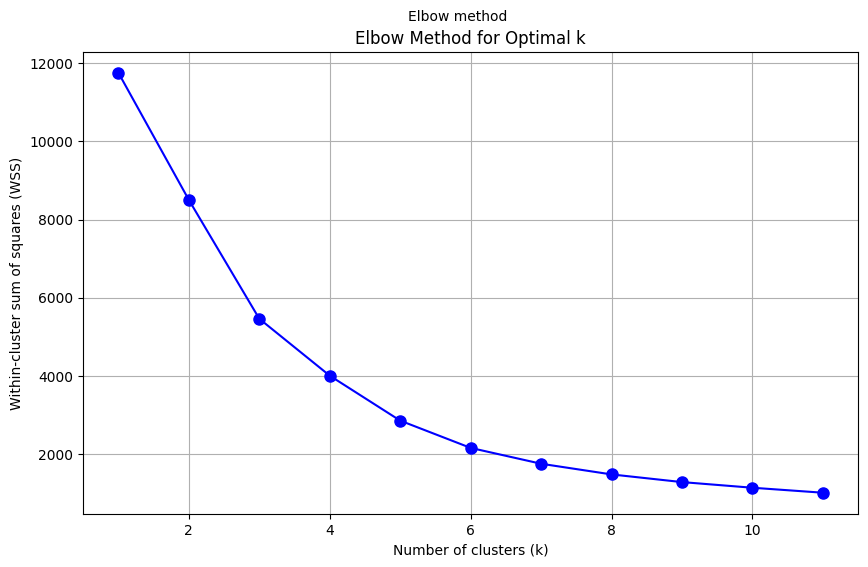

In [109]:
# Determine the optimal number of clusters using the elbow method
wss = []
k_range = range(1, 12)
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=25)
    kmeans.fit(X_features_scaled)
    wss.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(k_range, wss, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster sum of squares (WSS)')
plt.title('Elbow Method for Optimal k')
plt.suptitle('Elbow method', fontsize=10, y=0.95)
plt.grid(True)
plt.show()


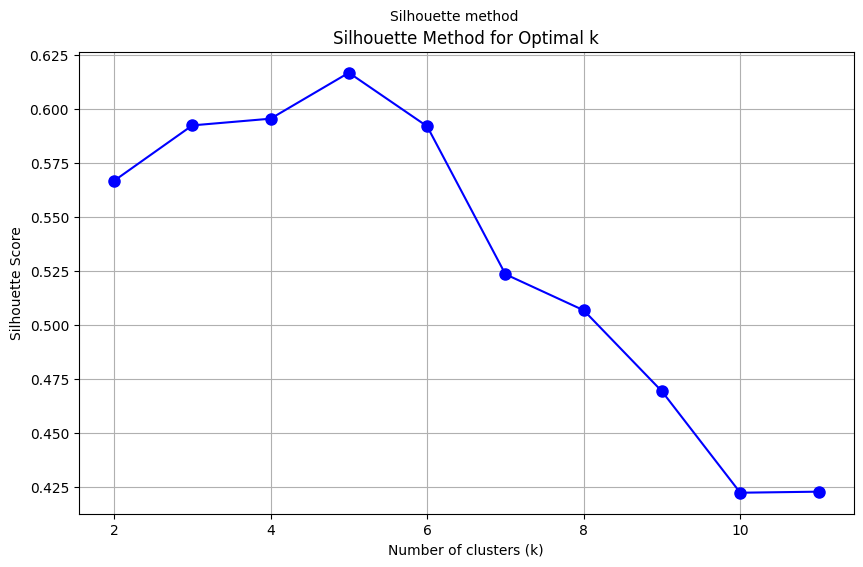

In [110]:
# Determine the optimal number of clusters using the silhouette scores method
silhouette_scores = []
k_range = range(2, 12)
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=25, random_state=42)
    kmeans.fit(X_features_scaled)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_features_scaled, labels))

# Plot the silhouette method
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.suptitle('Silhouette method', fontsize=10, y=0.95)
plt.grid(True)
plt.show()

In [114]:
kmeans = KMeans(n_clusters=3, random_state=0)
# 3 clusters
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('Silhouette Score : ',round(silhouette_score(X_features_scaled,labels),3))

Silhouette Score :  0.576


In [115]:
from kneed import KneeLocator

In [116]:
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: nd-array of shape (n_samples, n_features)
        nrefs: number of reference datasets to generate
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters+1)),))
    results_list = []
    
    for k in range(1, maxClusters+1):
        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
        
        # For n references, generate random sample and perform kmeans getting resulting dispersion of each
        for i in range(nrefs):
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
        
        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
        
        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
        
        # Assign this loop's gap statistic to gaps
        gaps[k-1] = gap
        
        results_list.append({'clusterCount': k, 'gap': gap})
    
    resultsdf = pd.DataFrame(results_list)
    
    return (gaps, resultsdf)

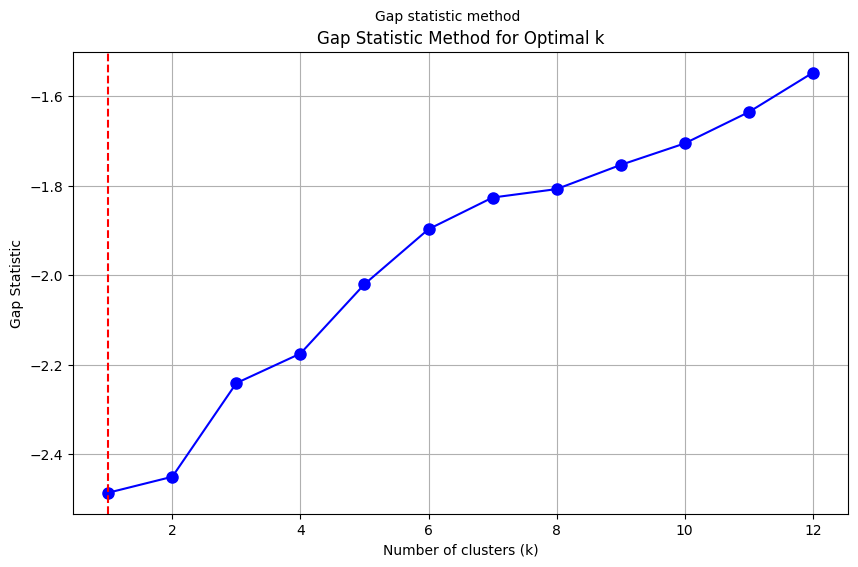

The optimal number of clusters is: 1


In [117]:
# Calculate the gap statistic
gaps, resultsdf = optimalK(X_features_scaled, nrefs=500, maxClusters=12)

# Find the optimal number of clusters using the KneeLocator
knee = KneeLocator(range(1, 13), gaps, curve='convex', direction='decreasing')

# Plot the gap statistic
plt.figure(figsize=(10, 6))
plt.plot(range(1, 13), gaps, 'bo-', markersize=8)
plt.axvline(knee.knee, color='red', linestyle='--')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic Method for Optimal k')
plt.suptitle('Gap statistic method', fontsize=10, y=0.95)
plt.grid(True)
plt.show()

print(f'The optimal number of clusters is: {knee.knee}')


In [118]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

from sklearn.covariance import EllipticEnvelope

from scipy.spatial import ConvexHull

In [119]:
# K-means clustering
# Fit K-means model
kmeans = KMeans(n_clusters=3, n_init=25)
kmeans.fit(X_features_scaled)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

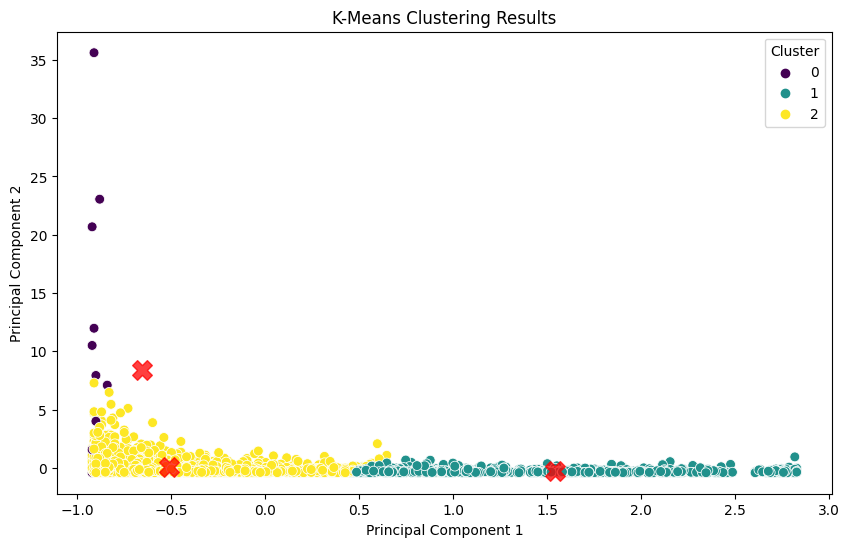

In [121]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_features_scaled[:, 0], y=X_features_scaled[:, 1], hue=labels, palette='viridis', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Means Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [123]:
# K-means clustering with 7 clusters
kmeans = KMeans(n_clusters=7, n_init=25)
kmeans.fit(X_features_scaled)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

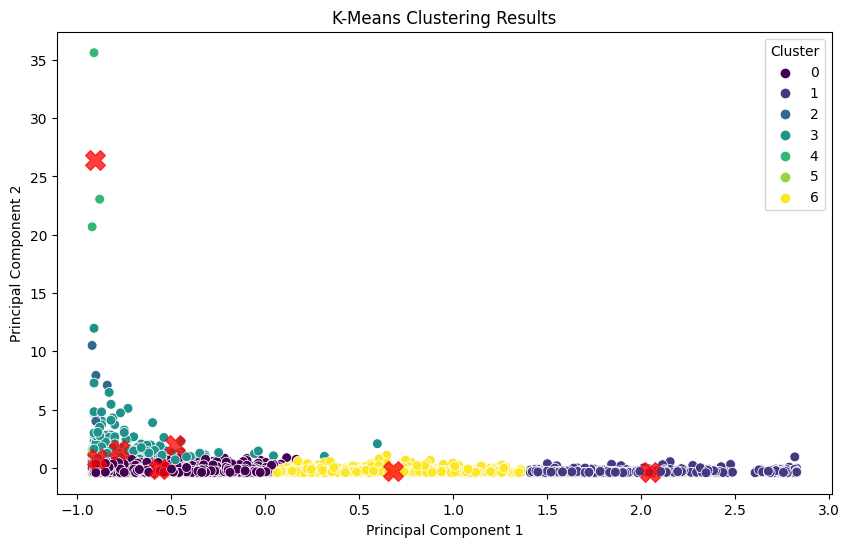

In [124]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_features_scaled[:, 0], y=X_features_scaled[:, 1], hue=labels, palette='viridis', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Means Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [125]:
# From the histograms above, most of the customers are centered in one area
# Therefore, log transformation must be performed for few big values to be cut down

cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])

# StandardScaler Transformation on Log Transformed Data
X_features_2 = cust_df[['Recency_log','Frequency_log','Monetary_log']].values
X_features_scaled_2 = StandardScaler().fit_transform(X_features_2)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled_2)
cust_df['cluster_label'] = labels

print('Silhouette Score : ',round(silhouette_score(X_features_scaled_2,labels),3))

Silhouette Score :  0.303


## even though silhouette score decreased a lot, it is far more realistic on real models

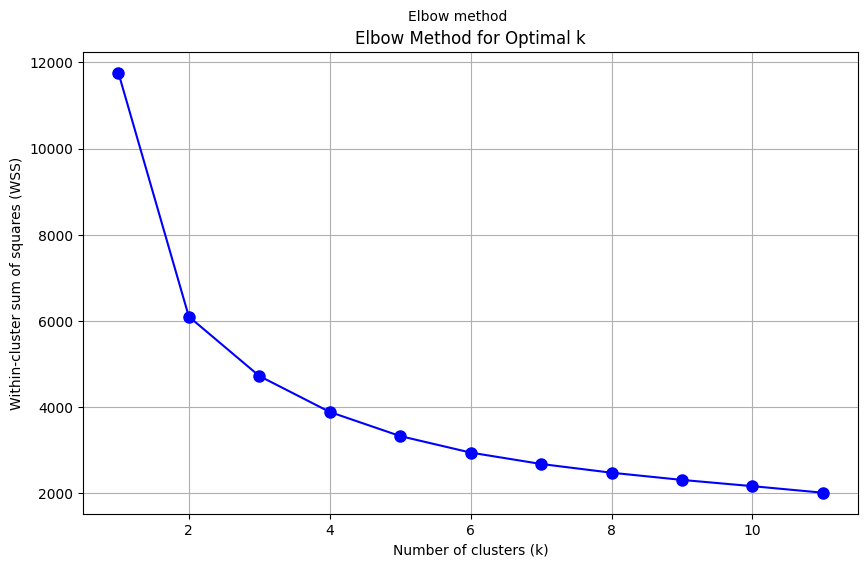

In [126]:
# Determine the optimal number of clusters using the elbow method
wss = []
k_range = range(1, 12)
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=25)
    kmeans.fit(X_features_scaled_2)
    wss.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(k_range, wss, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster sum of squares (WSS)')
plt.title('Elbow Method for Optimal k')
plt.suptitle('Elbow method', fontsize=10, y=0.95)
plt.grid(True)
plt.show()


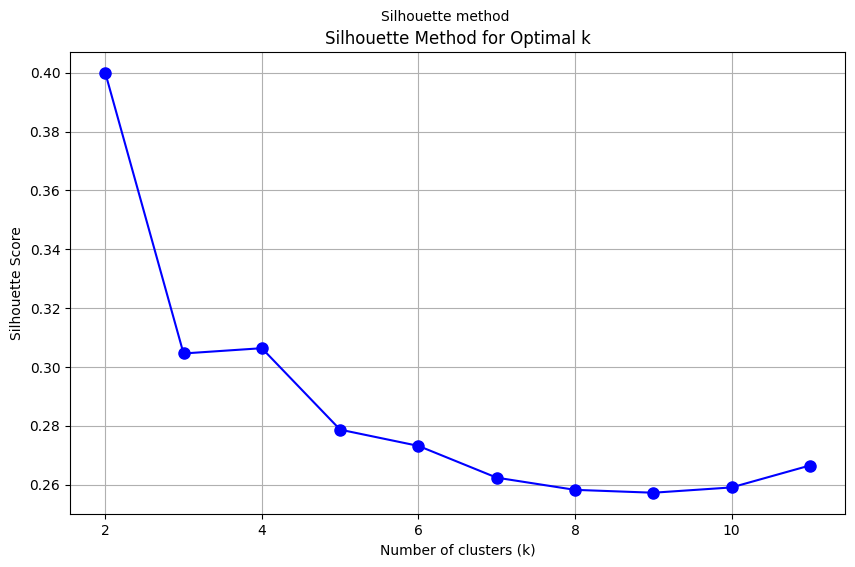

In [127]:
# Determine the optimal number of clusters using the silhouette scores method
silhouette_scores = []
k_range = range(2, 12)
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=25, random_state=42)
    kmeans.fit(X_features_scaled_2)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_features_scaled_2, labels))

# Plot the silhouette method
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.suptitle('Silhouette method', fontsize=10, y=0.95)
plt.grid(True)
plt.show()

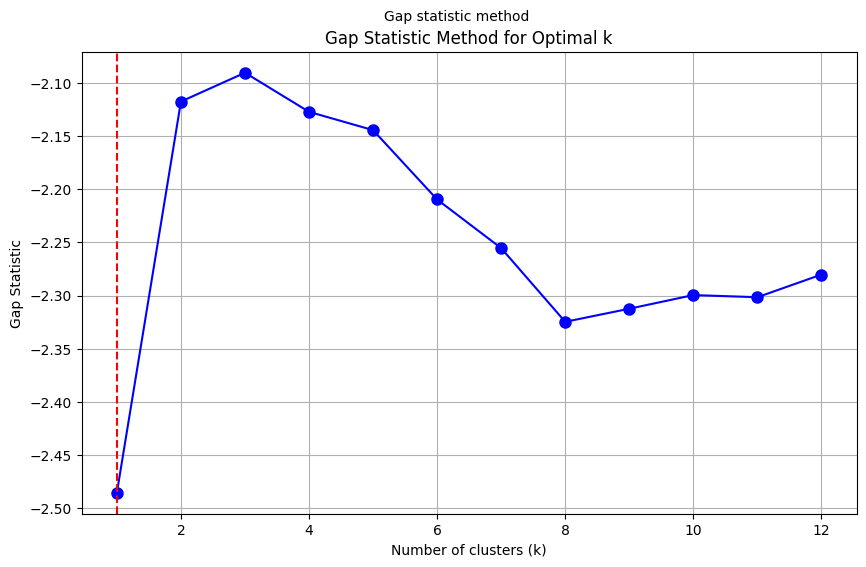

The optimal number of clusters is: 1


In [128]:
# Calculate the gap statistic
gaps, resultsdf = optimalK(X_features_scaled_2, nrefs=500, maxClusters=12)

# Find the optimal number of clusters using the KneeLocator
knee = KneeLocator(range(1, 13), gaps, curve='convex', direction='decreasing')

# Plot the gap statistic
plt.figure(figsize=(10, 6))
plt.plot(range(1, 13), gaps, 'bo-', markersize=8)
plt.axvline(knee.knee, color='red', linestyle='--')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic Method for Optimal k')
plt.suptitle('Gap statistic method', fontsize=10, y=0.95)
plt.grid(True)
plt.show()

print(f'The optimal number of clusters is: {knee.knee}')


In [135]:
# K-means clustering with 7 clusters
kmeans = KMeans(n_clusters=7, n_init=25)
kmeans.fit(X_features_scaled_2)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

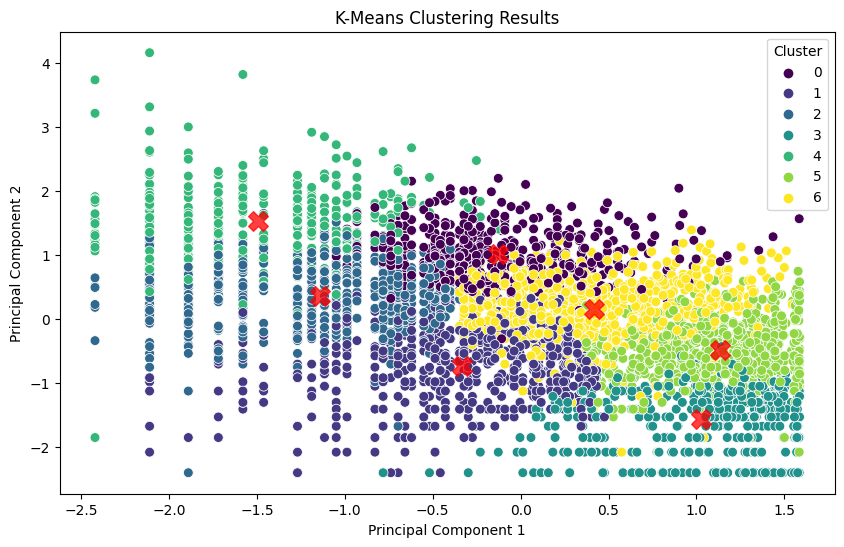

In [136]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_features_scaled_2[:, 0], y=X_features_scaled_2[:, 1], hue=labels, palette='viridis', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Means Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()